In [1]:
import torch
from torch.cuda import is_available
from torch.optim import Adam
from torch.nn import MSELoss, BCELoss
import numpy as np
import matplotlib.pyplot as plt
import cv2
from torch.utils.data import Dataset, DataLoader
from utils import ims, imshow
from conv3d import Conv3D, Check

### The outputs after each layer: 
`dim = (batch_size, channels, frames, height, width)`
* Conv3d layer 1: `(1, 16, 1, 160, 120)`

* Conv3d layer 2: `(1, 32, 1, 160, 120)`

* Conv3d layer 3: `(1, 16, 1, 160, 120)`

* Conv3d layer 4: `(1, 1, 1, 160, 120)`


In [2]:
torch.cuda.is_available()

True

In [3]:
model = Conv3D()
device = 'cuda:0'
print(device)
model.to(device)

cuda:0


Conv3D(
  (conv1): Sequential(
    (0): Conv3d(1, 16, kernel_size=(3, 1, 1), stride=(1, 1, 1))
    (1): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool3d(kernel_size=(1, 1, 1), stride=(1, 1, 1), padding=0, dilation=1, ceil_mode=False)
    (3): ReLU()
  )
  (conv2): Sequential(
    (0): Conv3d(16, 32, kernel_size=(1, 1, 1), stride=(1, 1, 1))
    (1): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool3d(kernel_size=(1, 1, 1), stride=(1, 1, 1), padding=0, dilation=1, ceil_mode=False)
    (3): ReLU()
  )
  (conv3): Sequential(
    (0): Conv3d(32, 16, kernel_size=(1, 1, 1), stride=(1, 1, 1))
    (1): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool3d(kernel_size=(1, 1, 1), stride=(1, 1, 1), padding=0, dilation=1, ceil_mode=False)
    (3): ReLU()
  )
  (conv4): Sequential(
    (0): Conv3d(16, 1, kernel_size=(1, 1, 1), stride=(1, 1, 1))
    (1): BatchN

In [4]:
from pytictoc import TicToc
t = TicToc()

In [5]:
t.tic()
dataset = Check(5, angle=0, keyposes=[4,5])
t.toc()

ValueError: too many values to unpack (expected 2)

In [7]:
len(dataset)

209

In [8]:
train_dl = DataLoader(dataset,batch_size=1,shuffle=True)

In [71]:
#Loss
criterion = MSELoss()
#Optimizer
optimizer = Adam(model.parameters(), lr=0.001)

## Training

In [13]:
from tqdm import tqdm

In [72]:
#Epochs
n_epochs = 15

for epoch in range(1, n_epochs+1):
    # monitor training loss
    train_loss = 0.0

    #Training
    for images,y in train_dl:
        images,y = images.to(device), y.to(device)
        # print('images.shape',images.shape)
        optimizer.zero_grad()

        out = model(images)

        loss = criterion(out.view(out.shape[2],out.shape[3],out.shape[4]), y)
        loss.backward()

        optimizer.step()
        train_loss += loss.item()
          
    train_loss = train_loss/len(train_dl)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch, train_loss))

Epoch: 1 	Training Loss: 0.156926
Epoch: 2 	Training Loss: 0.055517
Epoch: 3 	Training Loss: 0.048428
Epoch: 4 	Training Loss: 0.056364
Epoch: 5 	Training Loss: 0.046324
Epoch: 6 	Training Loss: 0.034311
Epoch: 7 	Training Loss: 0.047721
Epoch: 8 	Training Loss: 0.048587
Epoch: 9 	Training Loss: 0.041407
Epoch: 10 	Training Loss: 0.039160
Epoch: 11 	Training Loss: 0.037784
Epoch: 12 	Training Loss: 0.037403
Epoch: 13 	Training Loss: 0.048216
Epoch: 14 	Training Loss: 0.038078
Epoch: 15 	Training Loss: 0.046267


## Check
`240 images (80 samples from 15 experiments, 3 frames each)`

In [73]:
def ims(model_out,actual):
    fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(12,4))
    axes[0].imshow(model_out,cmap='gray',vmin=0,vmax=1)
    axes[0].set_title('Model')
    axes[1].imshow(actual,cmap='gray',vmin=0,vmax=1)
    axes[1].set_title('Average')
    plt.show()


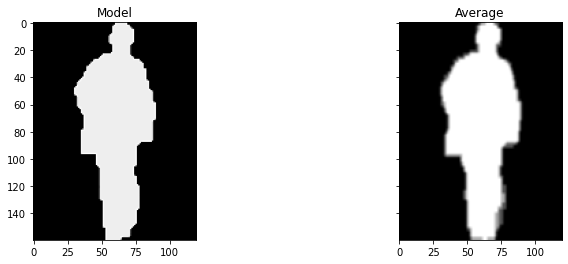

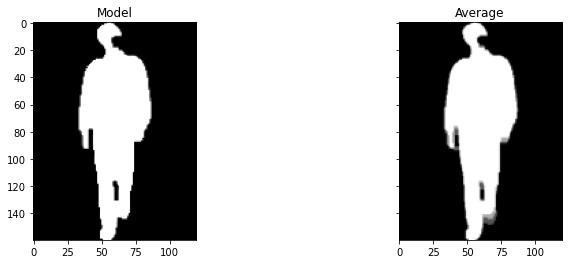

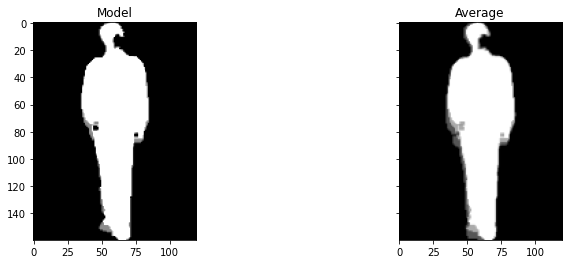

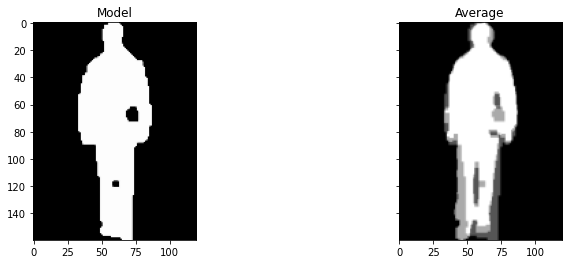

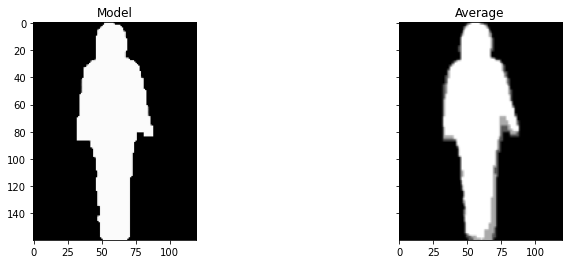

In [74]:

# type(axes)

for i,data in enumerate(train_dl):
    if i==5:
        break
    
    output = model(data[0].to(device=device))
    images = images.reshape(3,160,120)
    output = output.view(160, 120)
    output = output.cpu().detach().numpy()
    ims(output,data[1].reshape(160,120))




### Check one sample

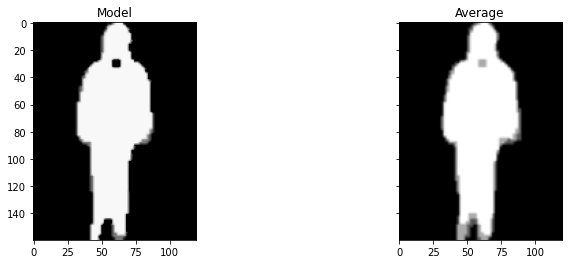

In [76]:
dataiter = iter(train_dl)
images, y = dataiter.next()
# images = images.to('cpu',dtype=torch.float)
# print(type(images),images.shape)

#Sample outputs
output = model(images.to(device=device))
images = images.cpu().numpy().reshape(3,160,120)
output = output.view(160, 120)
output = output.cpu().detach().numpy()

ims(output,y.view(160,120))

<ipython-input-77-a377d4ca0743>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


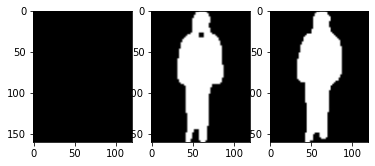

In [77]:
fig,ax = plt.subplots(nrows=1,ncols=3)
ax[0].imshow(images[0],cmap='gray')
ax[1].imshow(images[1],cmap='gray')
ax[2].imshow(images[2],cmap='gray')
fig.show()

# TEST DATA: ANGLE 90, KEYPOSE 6

In [85]:
test_ds = PEI(1,angle=90,keyposes=[6])

In [87]:
test_dl = DataLoader(test_ds,batch_size=1)

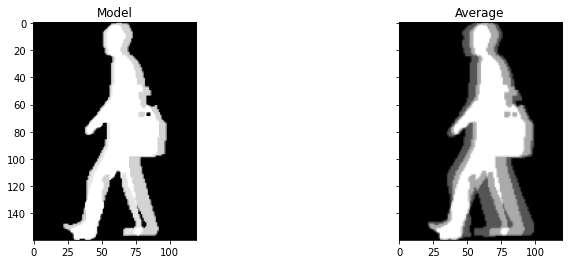

In [88]:
dataiter = iter(test_dl)
images, y = dataiter.next()
# images = images.to('cpu',dtype=torch.float)
# print(type(images),images.shape)

#Sample outputs
output = model(images.to(device=device))
images = images.cpu().numpy().reshape(3,160,120)
output = output.view(160, 120)
output = output.cpu().detach().numpy()

ims(output,y.view(160,120))

<ipython-input-89-a377d4ca0743>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


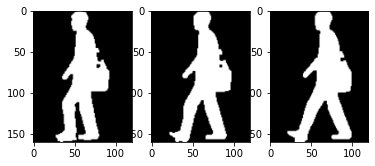

In [89]:
fig,ax = plt.subplots(nrows=1,ncols=3)
ax[0].imshow(images[0],cmap='gray')
ax[1].imshow(images[1],cmap='gray')
ax[2].imshow(images[2],cmap='gray')
fig.show()